# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abraham Willem Hersubagyo
- **Email:** abraham120604@gmail.com
- **ID Dicoding:** abraham_willemh

## Menentukan Pertanyaan Bisnis

- Bagaimana musim mempengaruhi peminjaman sepeda
- Pada jam berapa sajakah terjadinya trend (peningkatan signifikan) peminjaman sepeda di hari weekend 

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset didapatkan dengan baik

### Assessing Data

Pengecekan nilai kosong dengan `isnull()`

In [11]:
print(day_df.isnull().sum())
print('---------------')
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
---------------
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight**
- Dataset tidak memiliki kolom kosong karena yang dikembalikan adalah False

#### Pengecekan tabel `day.csv`

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight**
- Data berbentuk kuantitatif

Pengecekan duplicated columns

In [9]:
print(day_df.duplicated().sum())

0


**Insight**
- Tidak ada kolom yang terduplikasi

#### Pengecekan tabel `hour.csv`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight**
- Data berbentuk kuantitatif

Pengecekan kolom duplikasi

In [12]:
print(hour_df.duplicated().sum())

0


**Insight**
- Tidak ada kolom yang terduplikasi

#### Periksa Outlier pada kolom yang rawan

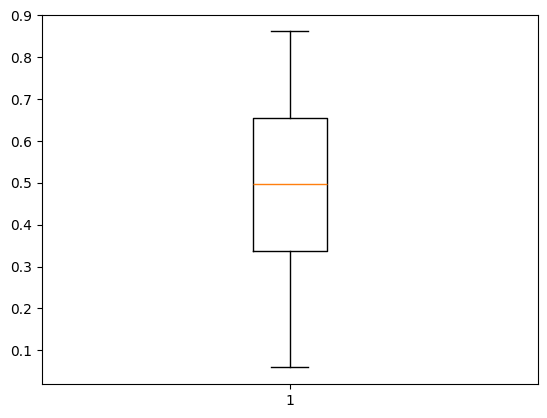

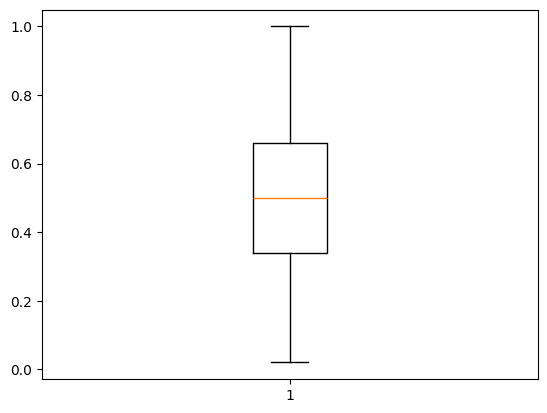

In [28]:
plt.boxplot(day_df['temp'])
plt.show()
plt.boxplot(hour_df['temp'])
plt.show()

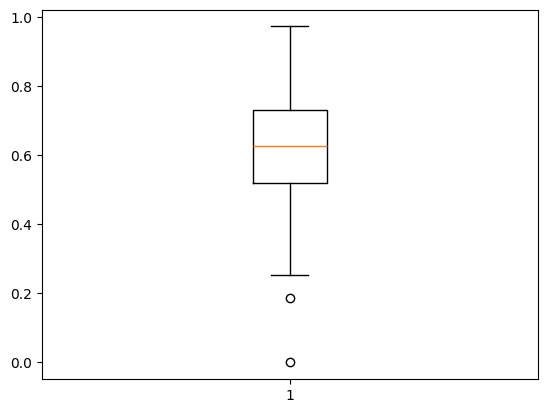

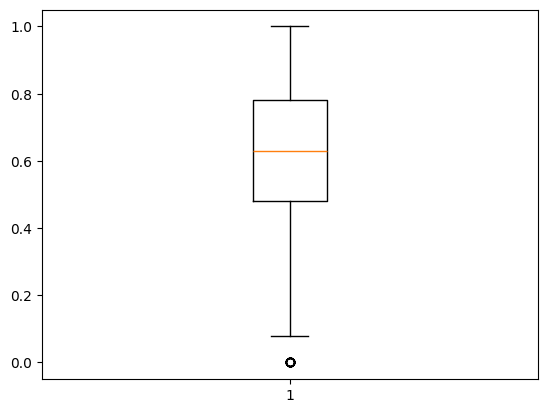

In [29]:
plt.boxplot(day_df['hum'])
plt.show()
plt.boxplot(hour_df['hum'])
plt.show()

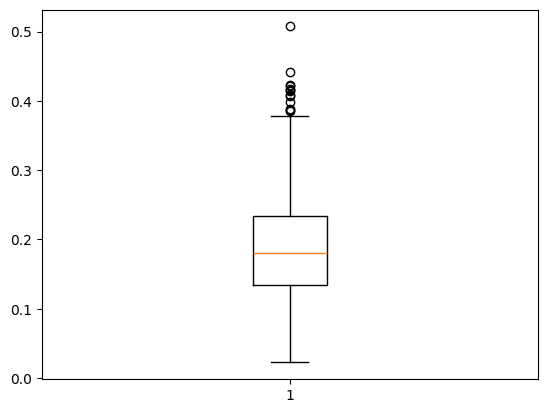

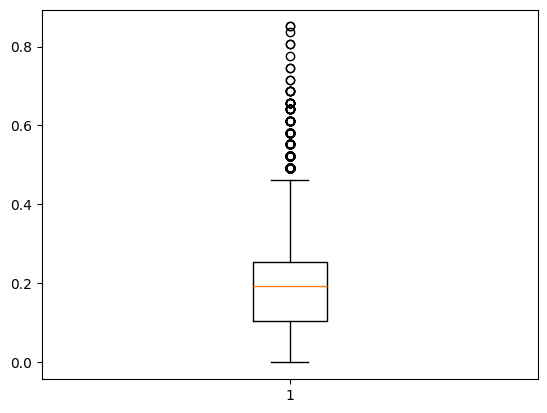

In [30]:
plt.boxplot(day_df['windspeed'])
plt.show()
plt.boxplot(hour_df['windspeed'])
plt.show()

**Insight**
- Data bebas dari outlier

### Cleaning Data

Membersihkan data sepertinya tidak diperlukan karena data sudah bersih. Mungkin yang dapat dilakukan adalah menghapus kolom yang tidak diperlukan seperti instant

In [31]:
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

## Exploratory Data Analysis (EDA)

### Explore `day_df_cleaned` dan `hour_df_cleaned`

In [34]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [35]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Tabel peminjaman sepeda berdasarkan musim

In [36]:
season_avg = day_df.groupby('season')['cnt'].mean()

# Menambahkan label musim
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']
season_avg.index = [season_labels[i-1] for i in season_avg.index]

# Membuat tabel rata-rata peminjaman sepeda berdasarkan musim
season_avg_df = pd.DataFrame(season_avg).reset_index()
season_avg_df.columns = ['Season', 'Average Bike Rentals']

# Menampilkan tabel
print(season_avg_df)


   Season  Average Bike Rentals
0  Winter           2604.132597
1  Spring           4992.331522
2  Summer           5644.303191
3    Fall           4728.162921


Tabel peminjaman sepeda berdasarkan jam pada hari sabtu dan minggu

- Hari sabtu

In [51]:
# Mengelompokkan data berdasarkan jam (hr) pada hari Sabtu (weekday = 6) dan menghitung rata-rata peminjaman (cnt)
hour_avg_saturday = hour_df[hour_df['weekday'] == 6].groupby('hr')['cnt'].mean()

# Menampilkan tabel rata-rata peminjaman berdasarkan jam pada hari Sabtu
hour_avg_saturday_df = pd.DataFrame(hour_avg_saturday).reset_index()
hour_avg_saturday_df.columns = ['Hour', 'Average Bike Rentals']
print(hour_avg_saturday_df)


    Hour  Average Bike Rentals
0      0             94.304762
1      1             67.780952
2      2             50.495238
3      3             22.885714
4      4              7.657143
5      5              8.291262
6      6             21.000000
7      7             45.961905
8      8            114.476190
9      9            186.790476
10    10            263.723810
11    11            328.609524
12    12            375.380952
13    13            385.371429
14    14            381.333333
15    15            382.428571
16    16            366.142857
17    17            334.409524
18    18            292.048077
19    19            239.932692
20    20            180.865385
21    21            156.000000
22    22            139.663462
23    23            115.855769


- Hari minggu

In [52]:
# Mengelompokkan data berdasarkan jam (hr) pada hari Sabtu (weekday = 6) dan menghitung rata-rata peminjaman (cnt)
hour_avg_sunday = hour_df[hour_df['weekday'] == 0].groupby('hr')['cnt'].mean()

# Menampilkan tabel rata-rata peminjaman berdasarkan jam pada hari Sabtu
hour_avg_sunday_df = pd.DataFrame(hour_avg_sunday).reset_index()
hour_avg_sunday_df.columns = ['Hour', 'Average Bike Rentals']
print(hour_avg_sunday_df)


    Hour  Average Bike Rentals
0      0             93.990385
1      1             77.432692
2      2             61.627451
3      3             31.144231
4      4              9.362745
5      5              8.693878
6      6             14.495146
7      7             33.104762
8      8             83.857143
9      9            156.542857
10    10            258.580952
11    11            315.380952
12    12            372.961905
13    13            374.933333
14    14            363.628571
15    15            353.933333
16    16            355.400000
17    17            318.771429
18    18            272.628571
19    19            225.476190
20    20            168.028571
21    21            127.647619
22    22             94.123810
23    23             61.895238


**Insight:**
- Musim panas (summer) adalah musim yang paling banyak mengalami peminjaman sepeda
- Pada hari-hari weekend, peminjaman sepeda lebih sering dilakukan dari siang-sore


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana musim mempengaruhi peminjaman sepeda?

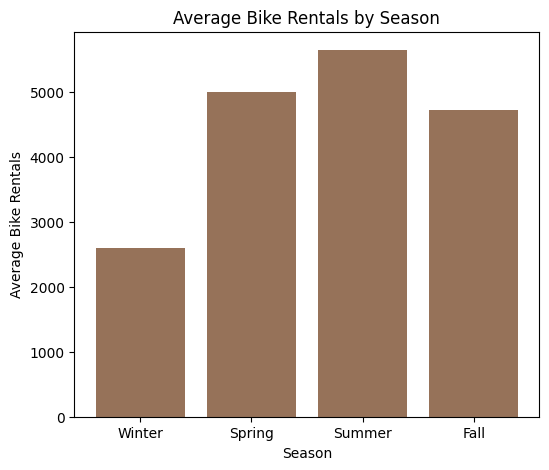

In [44]:
# Membuat bar chart
plt.figure(figsize=(6, 5))
plt.bar(season_avg_df['Season'], season_avg_df['Average Bike Rentals'], color='#967259')

# Menambahkan judul dan label sumbu
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')

# Menampilkan chart
plt.show()

**Insight:**
- Bisa kita lihat dari bar chart di atas bahwa peminjaman sepeda paling banyak dilakukan pada musim panas (summer) diikuti dengan musim semi (spring) dan musim gugur (fall), serta yang paling rendah adalah musim dingin (winter).

### Pertanyaan 2: Pada jam berapa sajakah terjadinya trend (peningkatan signifikan) peminjaman sepeda di hari weekend

- Hari sabtu

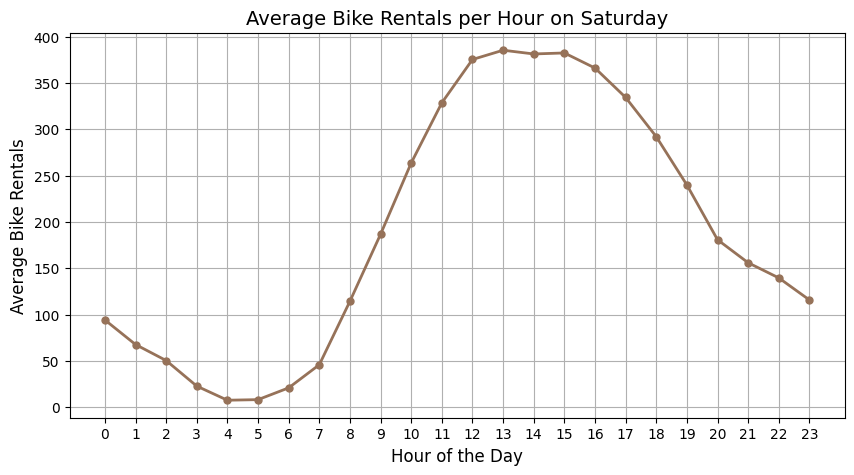

In [56]:
# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(hour_avg_saturday_df['Hour'], hour_avg_saturday_df['Average Bike Rentals'], marker='o', color='#967259', linestyle='-', linewidth=2, markersize=5)

# Memberikan judul dan label
plt.title('Average Bike Rentals per Hour on Saturday', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.xticks(np.arange(0, 24, 1))
plt.show()

**Insight:**
- Dapat kita lihat dari line chart di atas bahwa pada hari sabtu, peminjam rata-rata meminjam sepeda pada siang hari, mulai naik dari pukul 7 pagi perlahan-lahan hingga memuncak pada pukul 1 siang dan menurun lagi hingga malam.

- Hari minggu

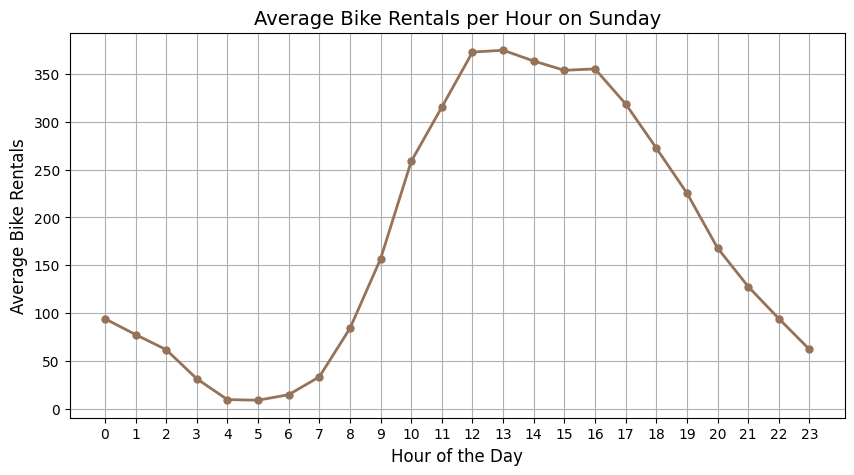

In [58]:
# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(hour_avg_sunday_df['Hour'], hour_avg_sunday_df['Average Bike Rentals'], marker='o', color='#967259', linestyle='-', linewidth=2, markersize=5)

# Memberikan judul dan label
plt.title('Average Bike Rentals per Hour on Sunday', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.xticks(np.arange(0, 24, 1))
plt.show()

**Insight**
- Pada hari minggu peminjaman sepeda hampir sama seperti pada hari sabtu. Kenaikan peminjaman dimulai dari pukul 7 pagi perlahan-lahan hingga memuncak pada pukul 1 siang, dan terjadi penurunan hingga malam.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1 : Peminjaman sepeda cenderung lebih banyak pada musim panas (summer) dan paling sedikit pada musim dingin (winter).
- Conclution pertanyaan 2 : Peminjaman sepeda pada weekend (sabtu dan minggu) memuncak pada pukul 1 siang.